In [1]:
import os
import joblib as jl
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
glob.glob('hrl_ode_logs/300823_sigmoid_baseline/*/sim_0.jl')

['hrl_ode_logs/300823_sigmoid_baseline/20230830122136.770099/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122136.773395/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122136.777018/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.338617/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.339688/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.340213/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.338664/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.340192/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.340100/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.342800/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.450276/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.450481/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.450241/sim_0.jl',
 'hrl_ode_logs/300823_sigmoid_baseline/20230830122137.623369/sim

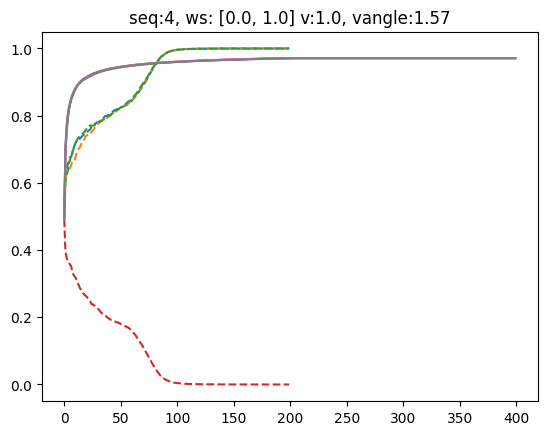

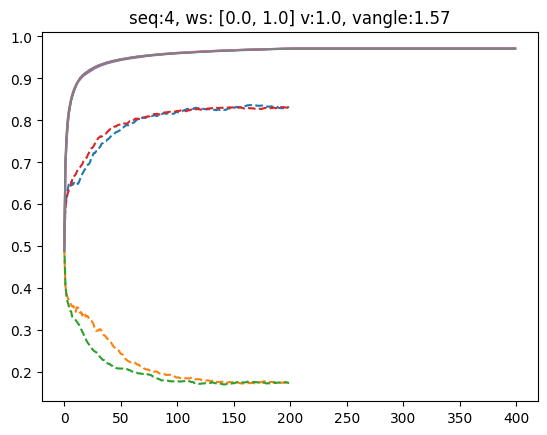

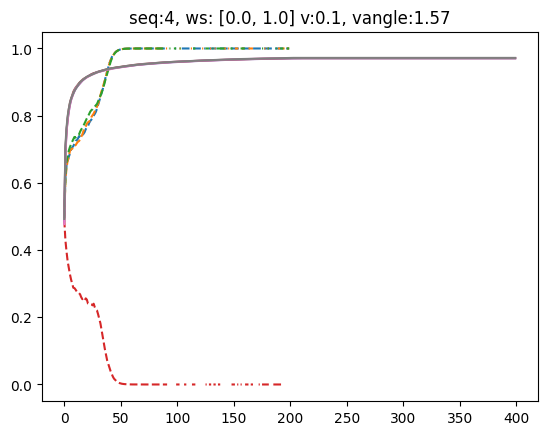

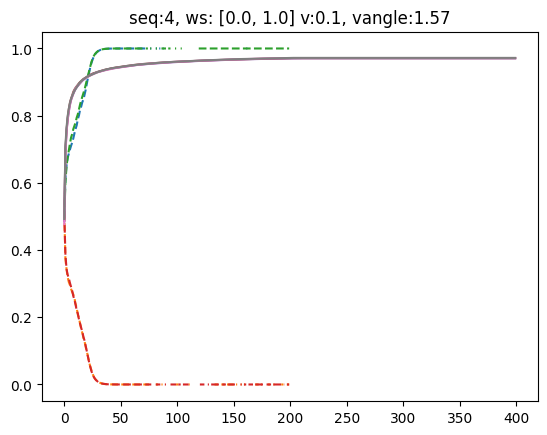

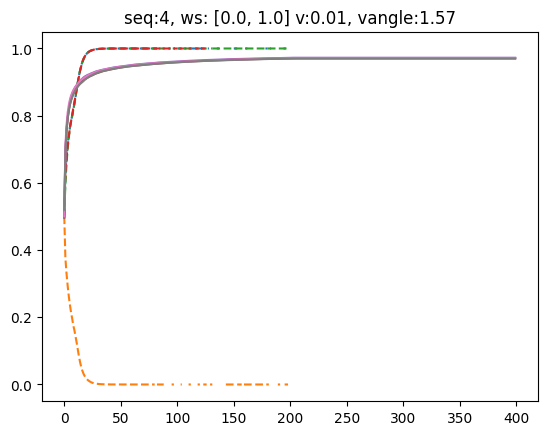

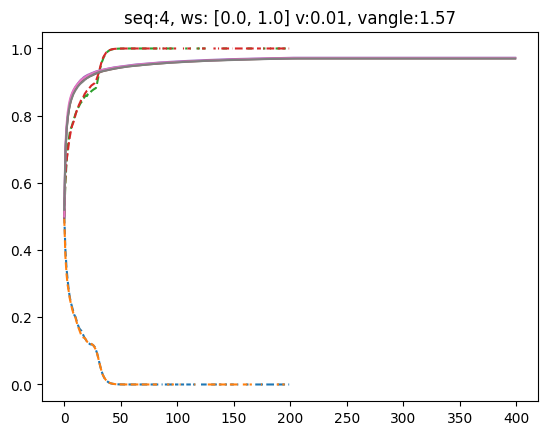

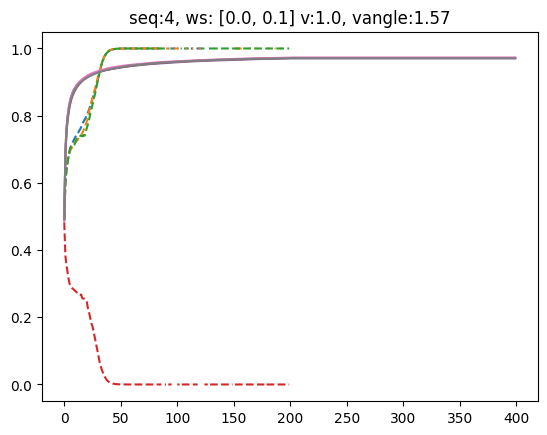

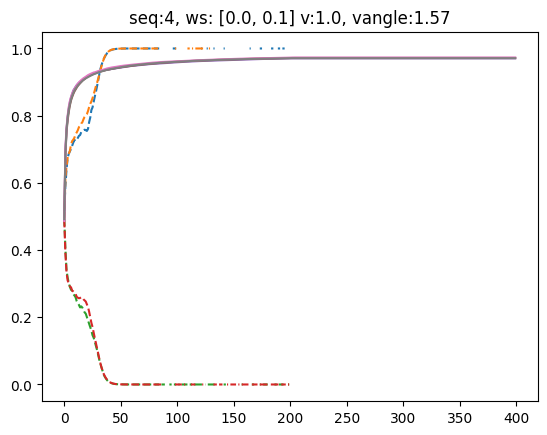

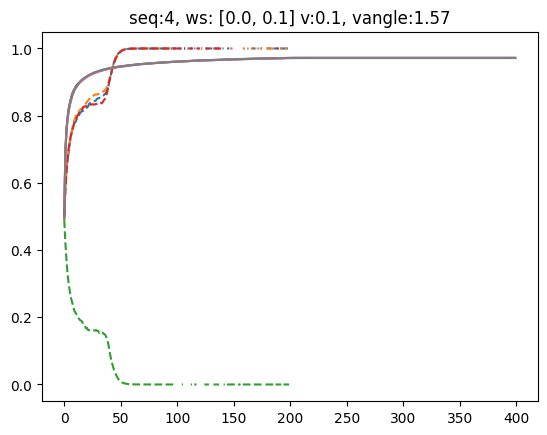

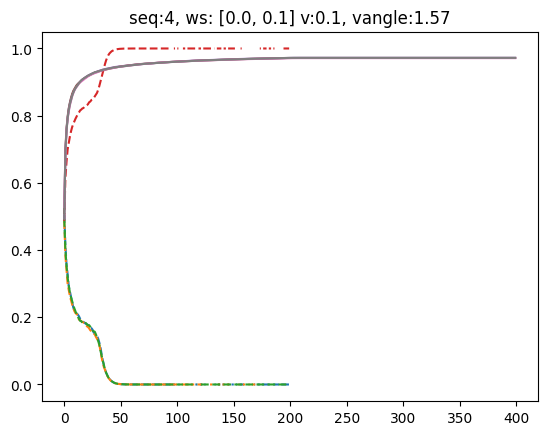

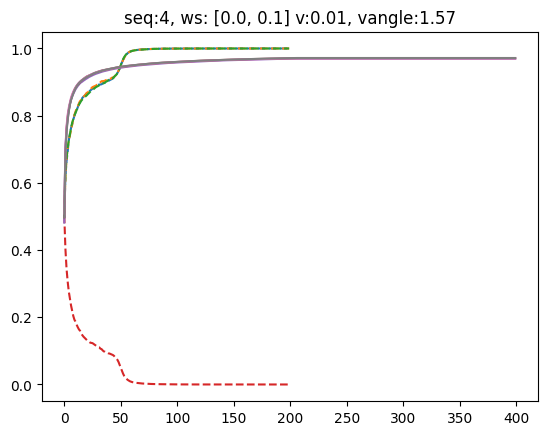

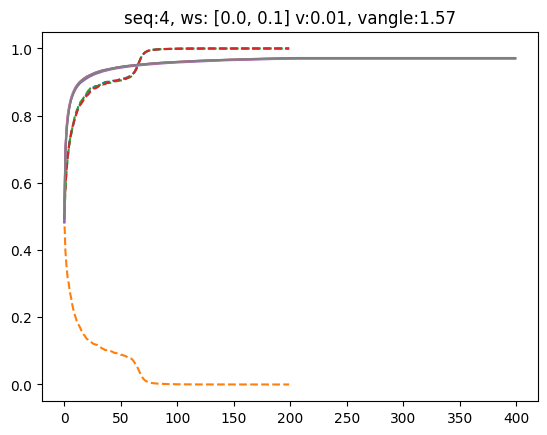

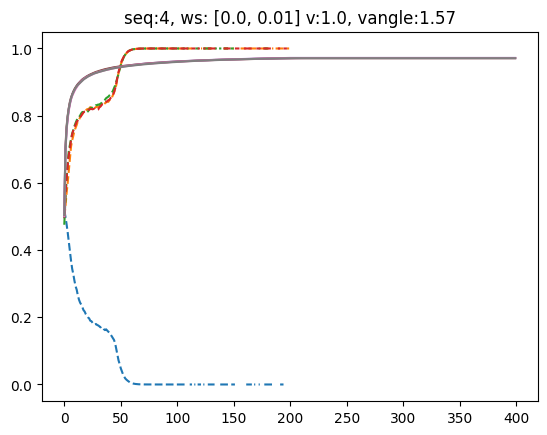

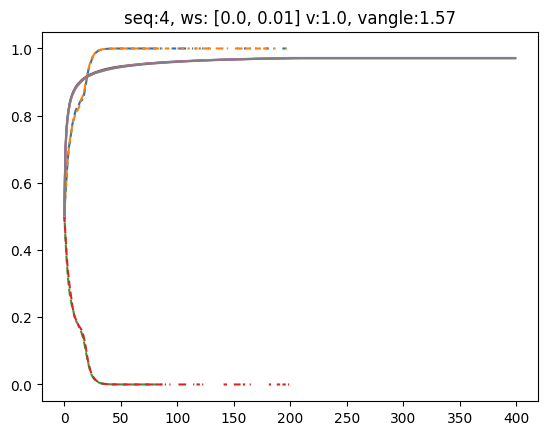

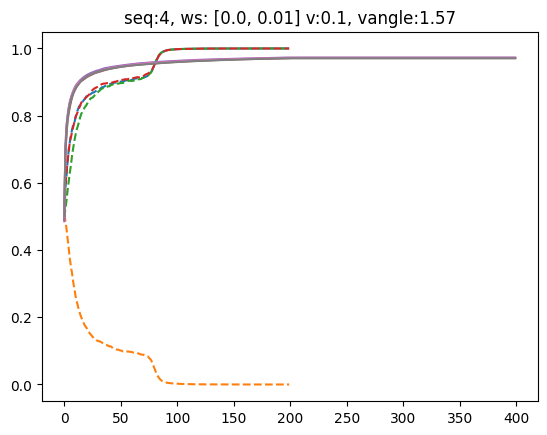

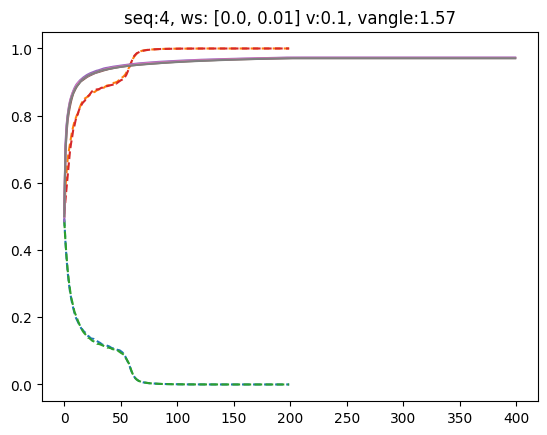

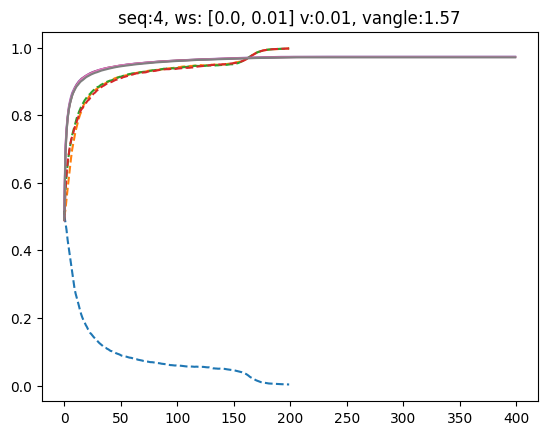

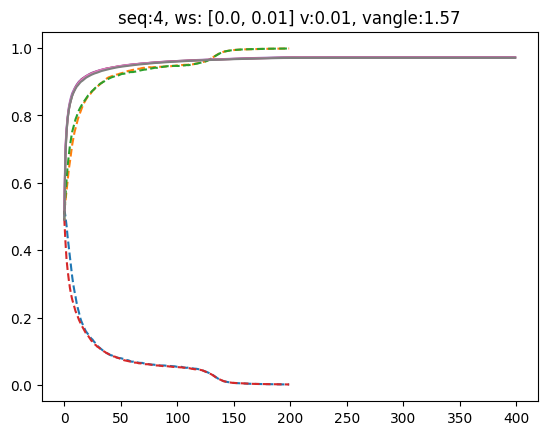

In [65]:
ps1 = glob.glob('hrl_ode_logs/300823_sigmoid_baseline/*')
ps2 = glob.glob('hrl_ode_logs/300823_sigmoid_curriculum/*')

for seq in [4]:
    for lrws in [1., 0.1, 0.01]:
        for lrv in [1., 0.1, 0.01]:
            for angle in [0.79, 1.57]:
                for p1 in ps1:
                    for p2 in ps2:
                        args1 = json.load(open(os.path.join(p1, 'args.json'), 'r'))
                        if args1['seq_length'] ==seq and args1['lr_ws'][1] == lrws and args1['lr_v']==lrv and args1['v_angle']==angle:
                            args2 = json.load(open(os.path.join(p2, 'args.json'), 'r'))
                            if args2['seq_length'] ==seq and args2['lr_ws'][1] == lrws and args2['lr_v']==lrv and args1['v_angle']==angle:
                                sim1 = jl.load(os.path.join(p1, 'sim_0.jl'))
                                sim2 = jl.load(os.path.join(p2, 'sim_0.jl'))
                                fig = plt.figure()
                                plt.plot(sim1['nid']['P'], ls='--')
                                plt.plot(sim2['nid']['P'])
                                plt.title(f"seq:{args1['seq_length']}, ws: {args1['lr_ws']} v:{args1['lr_v']}, vangle:{args['v_angle']}")
                                break

In [67]:
sim2['nid']['P']

array([[0.50148215, 0.50848879, 0.52027726, 0.49017504],
       [0.69195111, 0.6801999 , 0.70761519, 0.68660809],
       [0.76093959, 0.74824248, 0.75709916, 0.75138917],
       ...,
       [0.97275683, 0.97196644, 0.97178211, 0.97091031],
       [0.97275683, 0.97196644, 0.97178211, 0.97091031],
       [0.97275683, 0.97196644, 0.97178211, 0.97091031]])

In [52]:
lrv

0.1

In [35]:
sim['nid']['P_tilde_empirical']

array([0.06, 0.12, 0.14, 0.15, 0.23, 0.13, 0.2 , 0.27, 0.25, 0.23, 0.28,
       0.24, 0.37, 0.26, 0.29, 0.23, 0.35, 0.27, 0.32, 0.28, 0.23, 0.3 ,
       0.3 , 0.38, 0.17, 0.32, 0.31, 0.29, 0.31, 0.4 , 0.33, 0.22, 0.29,
       0.29, 0.34, 0.4 , 0.26, 0.28, 0.34, 0.32, 0.25, 0.33, 0.3 , 0.36,
       0.28, 0.31, 0.29, 0.31, 0.35, 0.28, 0.25, 0.35, 0.31, 0.29, 0.24,
       0.29, 0.34, 0.3 , 0.34, 0.34, 0.31, 0.29, 0.31, 0.3 , 0.3 , 0.29,
       0.3 , 0.29, 0.33, 0.34, 0.3 , 0.36, 0.3 , 0.32, 0.26, 0.32, 0.32,
       0.27, 0.29, 0.33, 0.29, 0.31, 0.34, 0.29, 0.32, 0.32, 0.33, 0.33,
       0.34, 0.32, 0.24, 0.4 , 0.24, 0.23, 0.35, 0.37, 0.36, 0.34, 0.3 ,
       0.34, 0.3 , 0.29, 0.38, 0.29, 0.25, 0.31, 0.27, 0.31, 0.32, 0.33,
       0.36, 0.29, 0.39, 0.25, 0.24, 0.31, 0.28, 0.3 , 0.34, 0.36, 0.34,
       0.31, 0.33, 0.27, 0.3 , 0.31, 0.25, 0.34, 0.37, 0.34, 0.34, 0.36,
       0.25, 0.34, 0.29, 0.37, 0.3 , 0.29, 0.33, 0.33, 0.32, 0.32, 0.33,
       0.32, 0.34, 0.26, 0.35, 0.36, 0.27, 0.39, 0.

## Typical dynamics look like:

In [2]:
def gather_results(rootdir, identical):
    args = json.load(open(os.path.join(rootdir, 'args.json'), 'r'))
    ps = []
    pts= []
    if identical:
        identical_flag = 'id'
    else:
        identical_flag = 'nid'
    for path in glob.glob( rootdir+'/ode*'):
        ode=jl.load(path)
        p=ode[identical_flag]['phase2']['P']
        p_tilde=ode[identical_flag]['phase2']['P_tilde']
        vs=ode[identical_flag]['phase2']['VS'][0]
        #vt=ode[identical_flag]['VT']
        ps.append(p)
        pts.append(p_tilde)
        
    return np.array(ps), np.array(pts), args
        

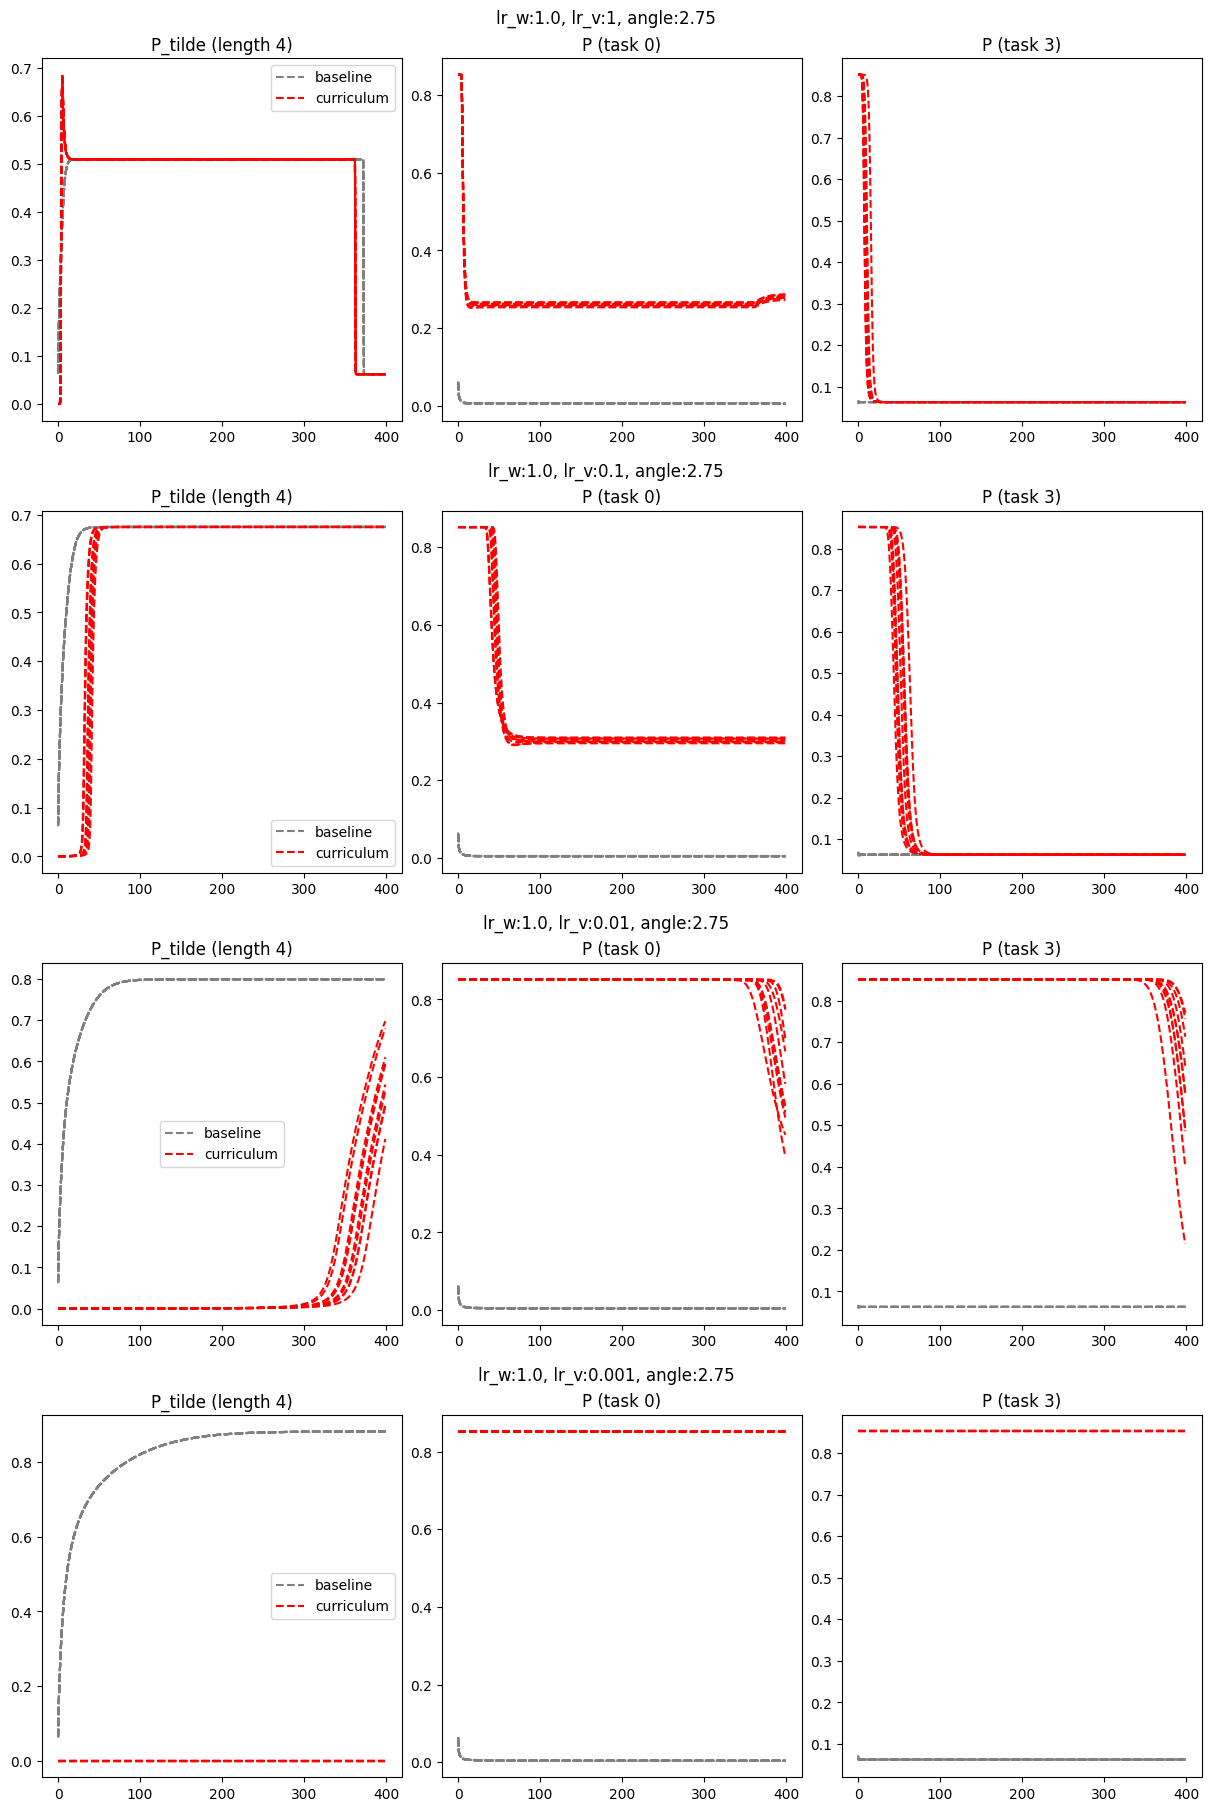

In [5]:
v_angle = [0.39, 0.79, 1.18, 1.57, 1.96, 2.36, 2.75]
v_angle = v_angle[-1]
fig = plt.figure(constrained_layout=True, figsize= (12,18) )
subfigs = fig.subfigures(nrows=4, ncols=1)

for subfig, lr_v in zip(subfigs, [1, 0.1, 0.01, 0.001]):
    lr_w = 1.0
    subfig.suptitle(f'lr_w:{lr_w}, lr_v:{lr_v}, angle:{v_angle}')
    axs = subfig.subplots(nrows=1, ncols=3)
    
    rootdirs=glob.glob('hrl_ode_logs/baseline_210823_VAngleImportance/*/')
    for rootdir in rootdirs:
        baseline_ps, baseline_pts, args=gather_results(rootdir, identical = True)
        if args['lr_ws'] ==[0, lr_w] and args['lr_v'] ==lr_v and args['v_angle'] ==str(v_angle):
            break
            
    rootdirs=glob.glob('hrl_ode_logs/curriculum_210823_VAngleImportance/*/')
    for rootdir in rootdirs:
        curriculum_ps, curriculum_pts, args=gather_results(rootdir, identical = True)
        if args['lr_ws'] ==[1.0, lr_w] and args['lr_v'] ==lr_v and args['v_angle'] ==str(v_angle):
            break
            
            
    baseline =axs[0].plot(baseline_pts.T **4, c = 'gray', ls = '--', label = 'baseline')
    curriculum= axs[0].plot(curriculum_pts.T**4, c = 'r', ls = '--', label = 'curriculum')
    axs[0].legend(handles = [baseline[0], curriculum[0]])
    axs[0].set_title('P_tilde (length 4)')

    axs[1].plot(baseline_ps[:,:,0].T**4, c = 'gray', ls = '--')
    axs[1].plot(curriculum_ps[:,:,0].T**4, c = 'r', ls = '--')
    axs[1].set_title('P (task 0)')
    
    
    axs[2].plot(baseline_ps[:,:,-1].T**4, c = 'gray', ls = '--')
    axs[2].plot(curriculum_ps[:,:,-1].T**4, c = 'r', ls = '--')
    axs[2].set_title('P (task 3)')
    

In [271]:
def gather_performance(rootdir, identical):
    args = json.load(open(os.path.join(rootdir, 'args.json'), 'r'))
    final_pts = []
    best_pts_ind = []
    best_pts = []
    if identical:
        identical_flag = 'id'
    else:
        identical_flag = 'nid'
    for path in glob.glob( rootdir+'/sim*'):
        ode=jl.load(path)
        p=ode[identical_flag]['phase2']['P']
        p_tilde=ode[identical_flag]['phase2']['P_tilde']
        final_pt = p_tilde[-1]
        best_pt_ind = np.argmax(p_tilde)
        best_pt = p_tilde[best_pt_ind]
        final_pts.append(final_pt)
        best_pts.append(best_pt)
        best_pts_ind.append(best_pt_ind)
    return args, final_pts, best_pts, best_pts_ind

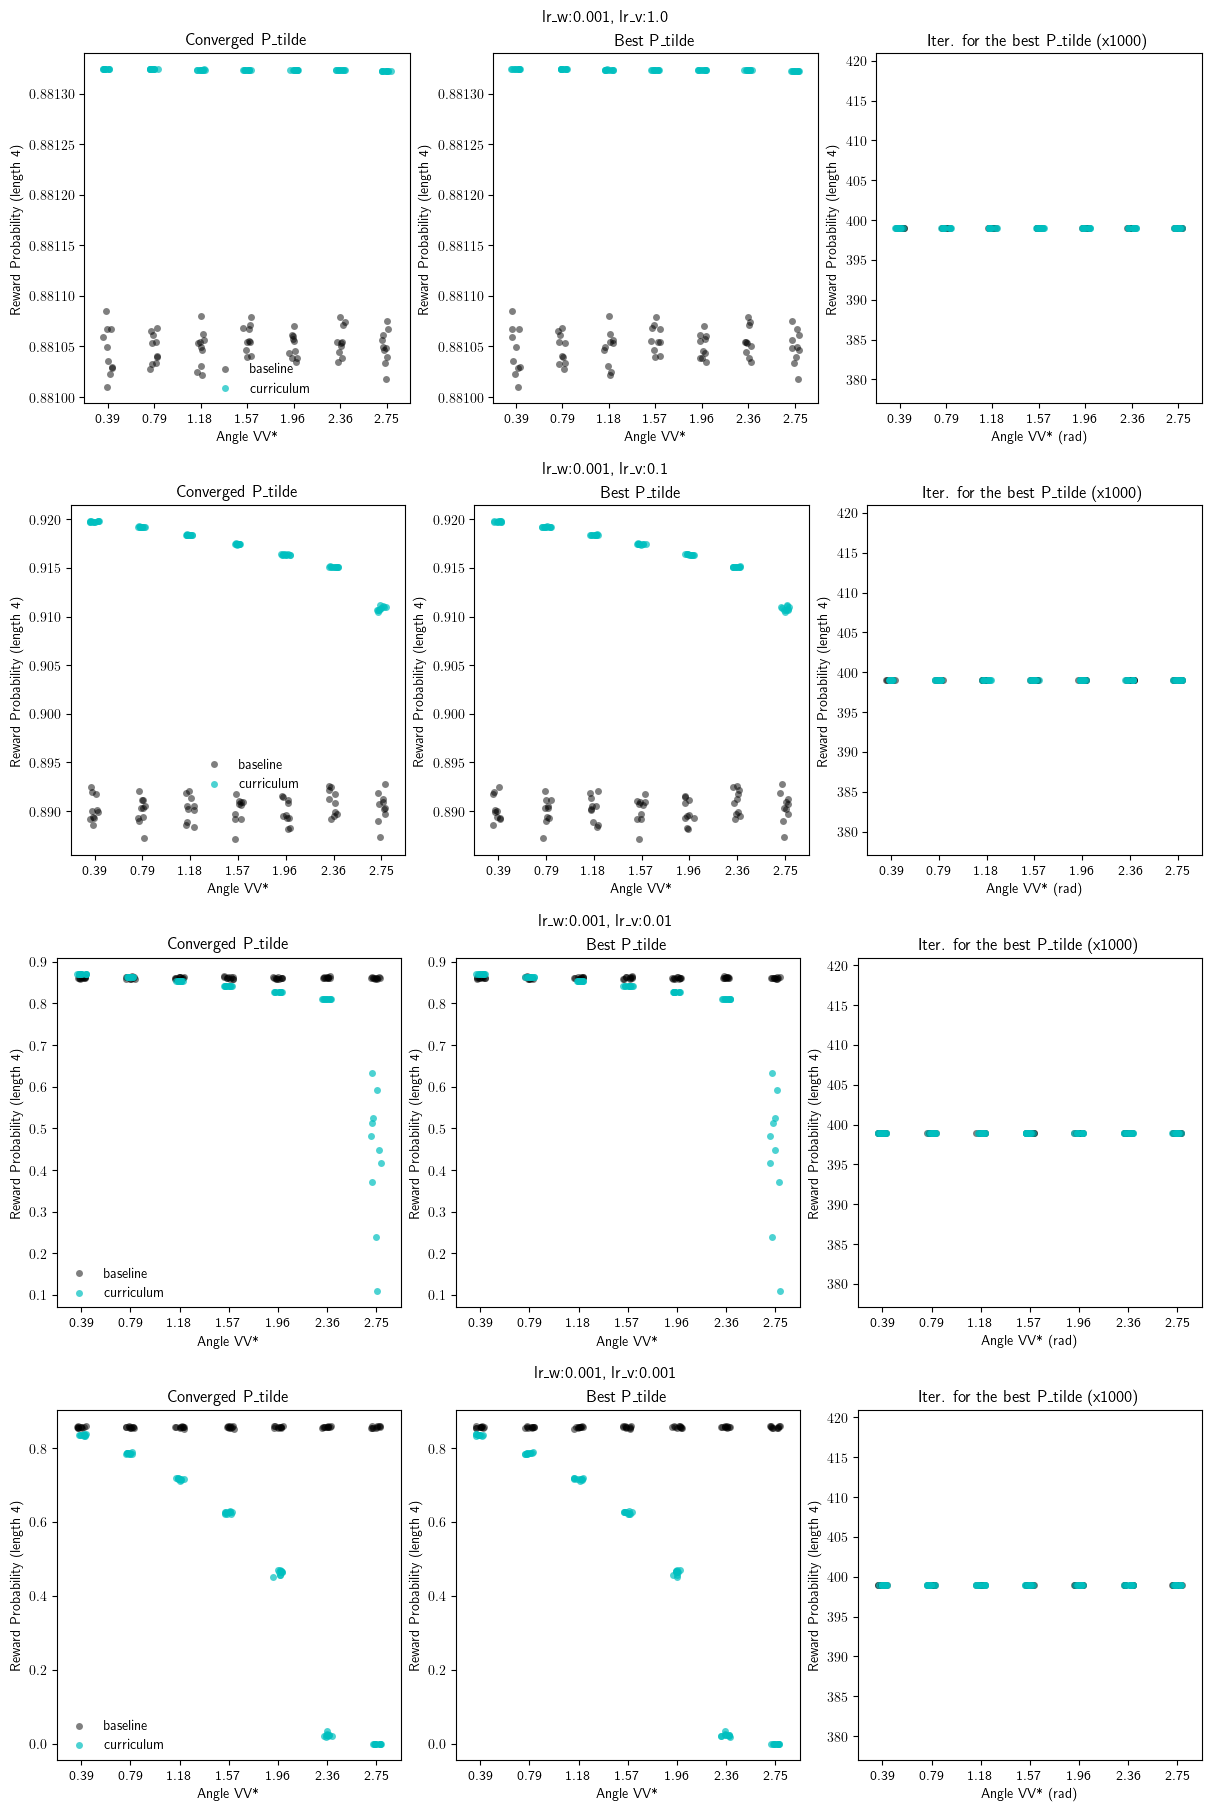

In [260]:
plt.rcParams['text.usetex'] = True

def plot_vv(subfig, baseline_final_df, baseline_best_df, baseline_best_ind_df, 
            curriculum_final_df, curriculum_best_df, curriculum_best_ind_df):
    ax1,ax2,ax3 = subfig.subplots(nrows=1, ncols=3)
    subfig.suptitle(f"lr_w:{lr_w}, lr_v:{lr_v}")

    sns.stripplot(data=baseline_final_df, x= 'variable', y='value',  color= 'k', ax=ax1, alpha = 0.5, label = 'baseline',)
    sns.stripplot(data=curriculum_final_df, x= 'variable', y='value',  color= 'c', ax=ax1, alpha = 0.7, label = 'curriculum')
    ax1.set_xlabel('Angle VV*')
    ax1.set_ylabel('Reward Probability (length 4)')
    ax1.set_title("Converged P_tilde")
    handles, labels = ax1.get_legend_handles_labels()
    l = ax1.legend([handles[0],handles[-1]], [labels[0],labels[-1]], bbox_to_anchor=(0.35, 0.15), frameon=False)

    sns.stripplot(data=baseline_best_df, x= 'variable', y='value',  color= 'k', ax=ax2, alpha = 0.5)
    sns.stripplot(data=curriculum_best_df, x= 'variable', y='value',  color= 'c', ax=ax2, alpha = 0.7)
    ax2.set_xlabel('Angle VV*')
    ax2.set_ylabel('Reward Probability (length 4)' )
    ax2.set_title('Best P_tilde')


    sns.stripplot(data=baseline_best_ind_df, x= 'variable', y='value',  color= 'k', ax=ax3, alpha = 0.5)
    sns.stripplot(data=curriculum_best_ind_df, x= 'variable', y='value',  color= 'c', ax=ax3, alpha = 0.7)
    ax3.set_xlabel('Angle VV* (rad)')
    ax3.set_ylabel('Reward Probability (length 4)')
    ax3.set_title('Iter. for the best P_tilde (x1000)')

    
fig = plt.figure(constrained_layout=True, figsize= (12,18) )
subfigs = fig.subfigures(nrows=4, ncols=1)

for subfig, lr_v in zip(subfigs, [1.0, 0.1, 0.01, 0.001]):
    
    lr_w = 0.001
    rootdirs=glob.glob('hrl_ode_logs/baseline_220823_VAngleImportance/*/')
    baseline_final = {}
    baseline_best = {}
    baseline_best_ind = {}
    for rootdir in rootdirs:
        args, final_pts, best_pts, best_pts_ind=gather_performance(rootdir, identical = True)
        if args['lr_ws'] ==[0, lr_w] and args['lr_v'] ==lr_v:
            baseline_final[args['v_angle']] = np.power(final_pts,4)
            baseline_best[args['v_angle']] = np.power(best_pts,4)
            baseline_best_ind[args['v_angle']] = best_pts_ind
    baseline_final_df=pd.DataFrame.from_dict(baseline_final ).sort_index(axis=1).melt()
    baseline_best_df=pd.DataFrame.from_dict(baseline_best ).sort_index(axis=1).melt()
    baseline_best_ind_df=pd.DataFrame.from_dict(baseline_best_ind ).sort_index(axis=1).melt()

    rootdirs=glob.glob('hrl_ode_logs/curriculum_220823_VAngleImportance/*/')
    curriculum_final = {}
    curriculum_best = {}
    curriculum_best_ind = {}
    for rootdir in rootdirs:
        args, final_pts, best_pts, best_pts_ind=gather_performance(rootdir, identical = True)
        if args['lr_ws'] ==[1.0, lr_w] and args['lr_v'] ==lr_v:
            curriculum_final[args['v_angle']] =np.power(final_pts,4)
            curriculum_best[args['v_angle']] = np.power(best_pts,4)
            curriculum_best_ind[args['v_angle']] = best_pts_ind
    curriculum_final_df=pd.DataFrame.from_dict(curriculum_final ).sort_index(axis=1).melt()
    curriculum_best_df=pd.DataFrame.from_dict(curriculum_best ).sort_index(axis=1).melt()
    curriculum_best_ind_df=pd.DataFrame.from_dict(curriculum_best_ind ).sort_index(axis=1).melt()
    plot_vv(subfig,baseline_final_df, baseline_best_df, baseline_best_ind_df, 
            curriculum_final_df, curriculum_best_df, curriculum_best_ind_df)

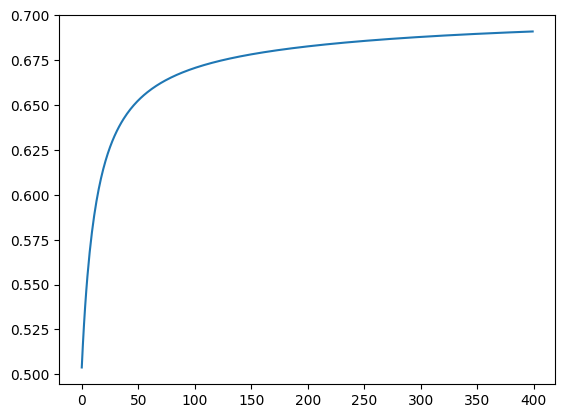

In [56]:
p1=ode['nid']['phase1']['P']
p2=ode['nid']['phase2']['P']

#plt.plot(np.concatenate([p1,p2]))
pt1=ode['nid']['phase1']['P_tilde']
pt2=ode['nid']['phase2']['P_tilde']

plt.plot(np.concatenate([pt1,pt2]))